In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn import (preprocessing, decomposition, manifold, neighbors)
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(dir):
    a = 0
    X = []
    
    imgdir = os.listdir(dir)
    imgdir.sort(key=lambda x:int(x[:-5]))
    for img in imgdir:
        imgpath = os.path.join(dir, img)
        image = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR)
        X.append(image)
        a += 1
    X = np.array(X)
    print(a)
        
    labdir = "./labels.txt"
    Y = np.asarray(np.loadtxt(labdir))
    
    return X, Y
    

In [3]:
def epsilon(data3d, n_neighbors=5, epsilon=2.5):
    rng = neighbors.radius_neighbors_graph(data3d, epsilon, mode="distance")
    model.dist_matrix_ = manifold.isomap.graph_shortest_path(rng, method=model.path_method, directed=False)
    G = model.dist_matrix_ ** 2
    G *= -0.5
    model.embedding_ = model.kernel_pca_.fit_transform(G)
    data2d = model.embedding_
    return model, data2d

In [4]:
# should be in main()
dir = "./output"
X, Y = load_data(dir)

5856


In [5]:
# def Scree_plot(X):
Z = np.asarray([X[i].flatten() for i in range(len(X))])
Z.shape

(5856, 160000)

In [6]:
scale_X = X/255.
Y = np.array([int(y) for y in Y])
scale_X.shape

(5856, 400, 400)

In [7]:
n = 15
Z = np.asarray([scale_X[i].flatten() for i in range(len(scale_X))])


In [ ]:
Z = preprocessing.scale(Z)
naive = decomposition.PCA(n_components=n)
%timeit naive.fit(Z)
sing_vals = np.arange(n) + 1
variance = naive.explained_variance_ratio_

In [ ]:
sum(naive.explained_variance_ratio_)

In [ ]:
plt.ylabel("% Variance Explained")
plt.xlabel("Principle Component")
plt.xticks(range(len(sing_vals)))
plt.title("Scree Plot")
plt.plot(sing_vals, variance, 'ro-', linewidth=2, label="Normal&Pneumonia")
plt.legend(loc='upper right')

In [ ]:
# def PCA_plot():
xp, xn = X[0:3884], X[3884:] 
zn, zp = Z[0:3884], Z[3884:] 
zn = scale(zn)
zp = scale(zp)
n_pca = decomposition.PCA(n_components=n)
p_pca = decomposition.PCA(n_components=n)
n_proj = n_pca.fit_transform(zn)
p_proj = p_pca.fit_transform(zp)
ln = plt.scatter(n_proj[:,0], n_proj[:,1], c='b', alpha=0.5)
lp = plt.scatter(p_proj[:,0], p_proj[:,1], c='g', alpha=0.5)
plt.legend((ln, lp), ("Normal", "Pneumonia"), loc = 'best')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest
from yellowbrick.features import Manifold


Y = np.array([int(y) for y in Y])

# 2D, k=10
model = Pipeline([("selectk", SelectKBest(k=2, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=10))])
trans1 = model.fit_transform(Z, Y)
model.named_steps['viz'].show()

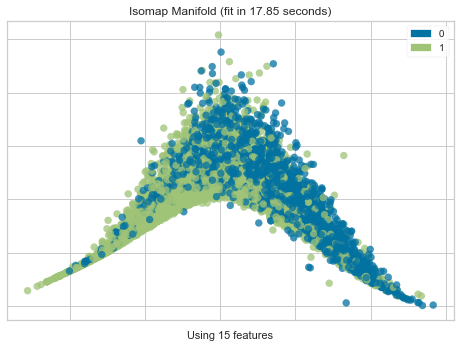

In [13]:
# 15D, k=20
model2 = Pipeline([("selectk", SelectKBest(k=n, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=20))])
trans2 = model2.fit_transform(Z, Y)
model2.named_steps['viz'].show()

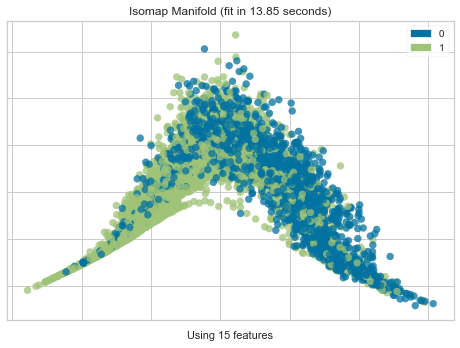

In [14]:
# 15D, k=10
model3 = Pipeline([("selectk", SelectKBest(k=n, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=10))])
trans3 = model3.fit_transform(Z, Y)
model3.named_steps['viz'].show()

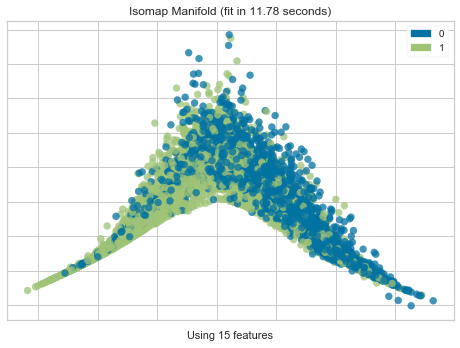

In [15]:
# 15D, k=5
model4 = Pipeline([("selectk", SelectKBest(k=n, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=5))])
trans4 = model4.fit_transform(Z, Y)
model4.named_steps['viz'].show()

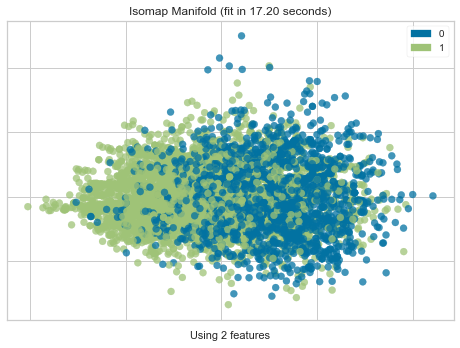

In [16]:
# 2D, k=20
model5 = Pipeline([("selectk", SelectKBest(k=2, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=20))])
trans5 = model5.fit_transform(Z, Y)
model5.named_steps['viz'].show()

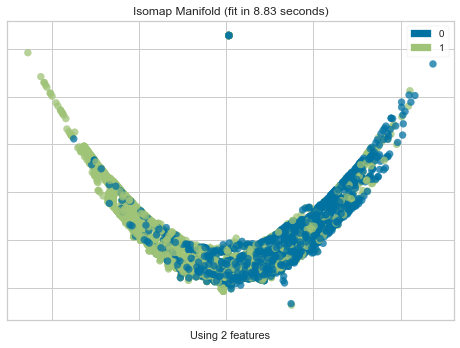

In [17]:
# 2D, k=5
model6 = Pipeline([("selectk", SelectKBest(k=2, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=5))])
trans6 = model6.fit_transform(Z, Y)
model6.named_steps['viz'].show()

In [ ]:
# 10D, k=10
model7 = Pipeline([("selectk", SelectKBest(k=10, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=10))])
trans7 = model7.fit_transform(Z, Y)
model7.named_steps['viz'].show()

In [ ]:
# 10D, k=5
model8 = Pipeline([("selectk", SelectKBest(k=10, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=5))])
trans8 = model8.fit_transform(Z, Y)
model8.named_steps['viz'].show()

In [ ]:
# 10D, k=20
model9 = Pipeline([("selectk", SelectKBest(k=10, score_func=f_classif)),("viz", Manifold(manifold="isomap", n_neighbors=20))])
trans9 = model9.fit_transform(Z, Y)
model9.named_steps['viz'].show()

In [ ]:
viz = Manifold(manifold="isomap")

viz.fit_transform(Z, Y)  
viz.show

/Users/jasonzhi/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/features/manifold.py:316: YellowbrickWarning: using n_neighbors=5; please explicitly specify for the 'isomap' manifold
  warnings.warn(warnmsg, YellowbrickWarning)


In [ ]:
# SVM 
from sklearn import svm
from sklearn.metrics import f1_score

def svm_class(X, Y):
    svm_model = svm.SVC()
    svm_model.fit(X, Y)
    y_hat = svm_model.predict(X)
    f1 = f1_score(Y, y_hat, average='binary')
    return f1

In [ ]:
naive2 = decomposition.PCA(n_components=n)
trans_pca = naive2.fit_transform(Z)
naive3 = decomposition.PCA(n_components=2)
trans_pca2 = naive3.fit_transform(Z)


In [ ]:
f1_pca = logistic_regression(trans_pca, Y)
f1_1 = logistic_regression(trans1, Y)
f1_2 = logistic_regression(trans2, Y)
f1_3 = logistic_regression(trans3, Y)
f1_4 = logistic_regression(trans4, Y)
f1_5 = logistic_regression(trans5, Y)
f1_6 = logistic_regression(trans6, Y)

In [ ]:
naive3 = decomposition.PCA(n_components=2)
trans_pca2 = naive3.fit_transform(Z)

f1_pca2 = logistic_regression(trans_pca2, Y)

In [ ]:
f1_pca2

In [ ]:
print("f1_pca: ", f1_pca)
print("f1_1: ", f1_1)
print("f1_2: ", f1_2)
print("f1_3: ", f1_3)
print("f1_4: ", f1_4)
print("f1_5: ", f1_5)
print("f1_6: ", f1_6)

In [ ]:
# classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix

def classify(X, Y):
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
    clf.fit(X, Y)
    y_hat = clf.predict(X)
    f1 = f1_score(Y, y_hat, average='binary') # F1 = 2 * (precision * recall) / (precision + recall)
    return f1


In [ ]:
naive2 = decomposition.PCA(n_components=n)
trans_pca = naive2.fit_transform(Z)


f1_naive = classify(Z, Y)
f1_pca = classify(trans_pca, Y)
f1_1 = classify(trans1, Y)
f1_2 = classify(trans2, Y)
f1_3 = classify(trans3, Y)
f1_4 = classify(trans4, Y)
f1_5 = classify(trans5, Y)

In [ ]:
print("f1_data: ", f1_naive)
print("f1_pca: ", f1_pca)
print("f1_1: ", f1_1)
print("f1_2: ", f1_2)
print("f1_3: ", f1_3)
print("f1_4: ", f1_4)
print("f1_5: ", f1_5)

In [ ]:
naive3 = decomposition.PCA(n_components=2)
trans_pca2 = naive3.fit_transform(Z)
f1_new = classify(trans_pca2, Y)
f1_new

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def logistic_regression(X, Y):
    clf = LogisticRegression().fit(X, Y)
    y_hat = clf.predict(X)
    f1 = f1_score(Y, y_hat, average='binary')
    return f1


In [ ]:
naive2 = decomposition.PCA(n_components=n)
trans_pca = naive2.fit_transform(Z)

In [ ]:
f1l_naive = logistic_regression(Z, Y)
print("f1l_data: ", f1l_naive)

In [ ]:
naive2 = decomposition.PCA(n_components=n)
trans_pca = naive2.fit_transform(Z)


f1l_naive = logistic_regression(Z, Y)
f1l_pca = logistic_regression(trans_pca, Y)
f1l_1 = logistic_regression(trans1, Y)
f1l_2 = logistic_regression(trans2, Y)
f1l_3 = logistic_regression(trans3, Y)
f1l_4 = logistic_regression(trans4, Y)
f1l_5 = logistic_regression(trans5, Y)


In [ ]:
print("f1l_data: ", f1l_naive)
print("f1l_pca: ", f1l_pca)
print("f1l_1: ", f1l_1)
print("f1l_2: ", f1l_2)
print("f1l_3: ", f1l_3)
print("f1l_4: ", f1l_4)
print("f1l_5: ", f1l_5)

In [6]:
import yellowbrick.features.manifold as man

In [7]:
man.Manifold2D()

AttributeError: module 'yellowbrick.features.manifold' has no attribute 'Manifold2D'